In [1]:
import h5py
import numpy as np
import os
# import torch
# import pyvista

import matplotlib.pyplot as plt

In [28]:
file = os.path.join('..','data','pore-detection','pore_001-00.hdf5')

print(os.path.exists(file))
print(os.path.isfile(file))

True
True


In [29]:
f1 = h5py.File(file, 'r') 

In [30]:
for key in f1.keys():
    print('shape of %s' %key,f1[key].shape)
    print('dtype of %s' %key,f1[key].dtype)

shape of masks (2, 204, 389, 386)
dtype of masks bool
shape of raw (204, 389, 386)
dtype of raw float64


bool


(2, 204, 389, 386)

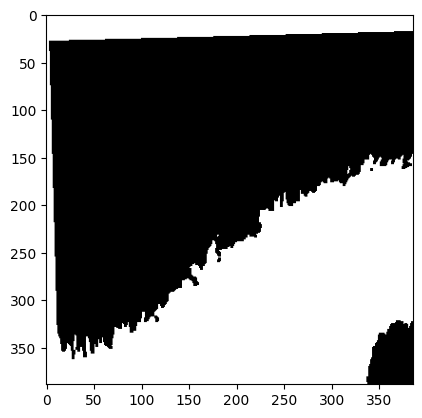

In [31]:
slice = 20
predictions = np.array(f1['masks'])

print(predictions.dtype)


fig, ax = plt.subplots(1)
ax.imshow(predictions[0,slice,:,:],cmap='gray')

predictions.shape

In [8]:
def extract_blocks_2d(a, blocks, keep_as_view=False):
    w,h = a.shape
    m, n = blocks
    
    b1,b2 =w//m , h//n


    if w % b1 == 0:
        a = a
    else:
        a = a[:-1,:]
    
    if h % b2 == 0:
        a = a
    else:
        a = a[:,:-1]


    if keep_as_view==0:
        return a.reshape(w//b1,b1,h//b2,b2).swapaxes(1,2).reshape(-1,b1,b2)
    else:
        return a.reshape(w//b1,b1,h//b2,b2).swapaxes(1,2)

In [9]:
def extract_blocks_3d(a, blocks, keep_as_view=False):
    d,w,h = a.shape
    k, m, n = blocks
    
    b0, b1, b2 = d//k, w//m , h//n
    
    if d % b0 == 0:
        a = a
    else:
        a = a[:-1,:,:]

    if w % b1 == 0:
        a = a
    else:
        a = a[:,:-1,:]
    
    if h % b2 == 0:
        a = a
    else:
        a = a[:,:,:-1]


    if keep_as_view==0:
        return a.reshape(d//b0,b0,w//b1,b1,h//b2,b2).transpose(0,2,4,1,3,5).reshape(-1,b0,b1,b2)
    else:
        return a.reshape(d//b0,b0,w//b1,b1,h//b2,b2).transpose(0,2,4,1,3,5).swapaxes(3,4)

In [14]:
def extract_blocks_3d(a, blocks, keep_as_view=False):
    c,d,w,h = a.shape
    k, m, n = blocks
    
    b0, b1, b2 = d//k, w//m , h//n
    
    if d % b0 == 0:
        a = a
    else:
        a = a[:,:-1,:,:]

    if w % b1 == 0:
        a = a
    else:
        a = a[:,:,:-1,:]
    
    if h % b2 == 0:
        a = a
    else:
        a = a[:,:,:,:-1]


    if keep_as_view==0:
        return a.reshape(c,d//b0,b0,w//b1,b1,h//b2,b2).transpose(1,3,5,0,2,4,6).reshape(-1,c,b0,b1,b2)
    else:
        return a.reshape(c,d//b0,b0,w//b1,b1,h//b2,b2).transpose(1,3,5,0,2,4,6).swapaxes(3,4)

In [21]:
len(predictions)

2

In [26]:
a = predictions



b = extract_blocks_3d(a, (1,2,2), keep_as_view=False)


print(len(a.shape))

len(a)

4


2

In [19]:
np.prod((1,3,2))

6

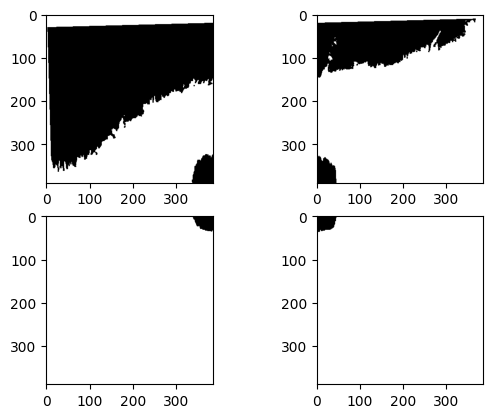

In [20]:
slice = 20

fig, ax = plt.subplots(2,2)
ax[0][0].imshow(b[0,0,slice,:,:],cmap='gray')
ax[0][1].imshow(b[1,0,slice,:,:],cmap='gray')
ax[1][0].imshow(b[2,0,slice,:,:],cmap='gray')
ax[1][1].imshow(b[3,0,slice,:,:],cmap='gray')

In [171]:
a = predictions[:,:,:-1]

b = a.reshape(1,204,2,389,2,386).transpose(0,2,4,1,3,5).reshape(-1,204,389,386)
b.shape

(4, 204, 389, 386)

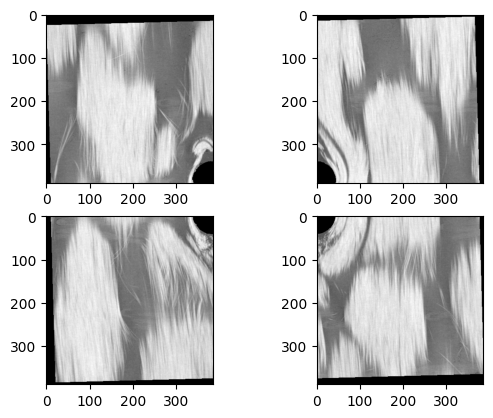

In [172]:
slice = 100

fig, ax = plt.subplots(2,2)
ax[0][0].imshow(b[0,slice,:,:],cmap='gray')
ax[0][1].imshow(b[1,slice,:,:],cmap='gray')
ax[1][0].imshow(b[2,slice,:,:],cmap='gray')
ax[1][1].imshow(b[3,slice,:,:],cmap='gray')

In [8]:
vol  = f1['raw']
label =f1['label']


print(vol.shape)
print(label.shape)
print(type(label))
print(np.unique(label))
cls = np.unique(label)

(50, 1000, 1000)
(50, 1000, 1000)
<class 'h5py._hl.dataset.Dataset'>
[  0.     127.6375 135.8135 172.4492]


4
(4, 50, 1000, 1000) <class 'numpy.ndarray'>


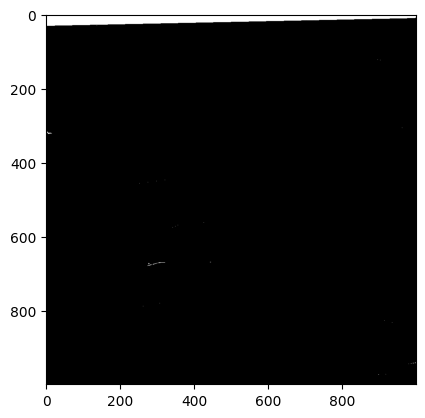

In [10]:
slice = 20
mask = np.array(label)
obj_ids = np.unique(mask)
obj_ids = obj_ids[:]
print(len(obj_ids))

masks = mask == obj_ids[:, None, None, None]
print(masks.shape,type(masks))



fig, ax = plt.subplots(1)
ax.imshow(masks[0,slice,:,:],cmap='gray')

In [31]:

print(masks[0,:,:,:].shape)
print(type(masks))
print(masks.dtype)
data = pyvista.wrap(masks[2,:,:,:].astype('uint8'))
# data.plot(volume=True)

points = np.random.random((10, 10,10))
print(points.shape)
print(type(points))
cloud = pyvista.wrap(points)

data.plot()

(50, 1000, 1000)
<class 'numpy.ndarray'>
bool
(10, 10, 10)
<class 'numpy.ndarray'>


Widget(value="<iframe src='http://localhost:55447/index.html?ui=P_0x1cec8e9c7f0_18&reconnect=auto' style='widt…

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

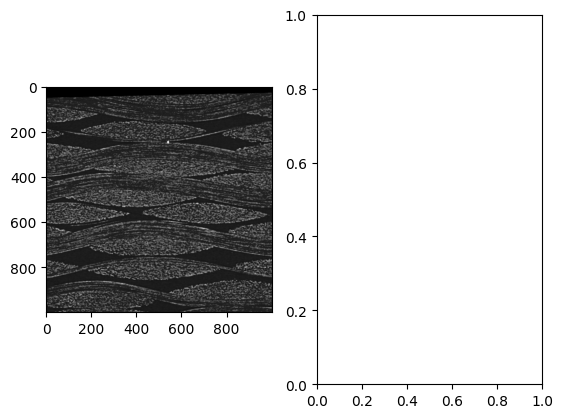

In [21]:
fig, ax = plt.subplots(1,2)
slice = 10
ax[0].imshow(vol[slice,:,:],cmap='gray')
ax[1].imshow(label2[slice,:,:])
# ax[2].imshow(pred[slice,:,:])

ax[0].title.set_text('CT-Data')
ax[1].title.set_text('GroundTruth')
# ax[2].title.set_text('Prediction')
ax[0].axis('off')
ax[1].axis('off')
# ax[2].axis('off')
# plot = ax[2].pcolor(pred[slice,:,:])
# fig.colorbar(plot)

In [1]:
import numpy as np

In [19]:
a = np.random.random([1000,1000])
a.shape

(1000, 1000, 1000)

In [20]:
b = extract_blocks(a, (500,500), keep_as_view=True)
b.shape

(2, 2, 500, 500, 2, 500)